In [57]:
from glob import glob
import numpy as np 
import pandas as pd
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings('ignore')

import argparse
import gc
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from piece_detector import *

In [65]:
img_groups = [glob(f'train_imgs/g{i} *') for i in range(1, 5)]

In [156]:
img1 = cv2.cvtColor(cv2.imread('train_imgs/g4 (1).jpg'), cv2.COLOR_BGR2RGB)[:, 160:]
img2 = cv2.cvtColor(cv2.imread('train_imgs/g1 (2).jpg'), cv2.COLOR_BGR2RGB)

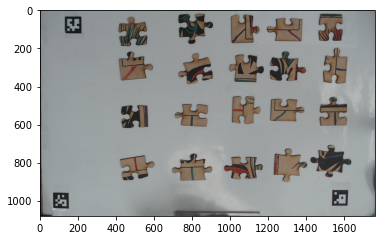

In [157]:
plt.imshow(img1)

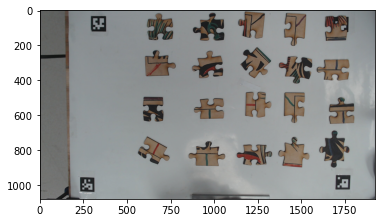

In [124]:
plt.imshow(img2)

In [125]:
detector = Detector()

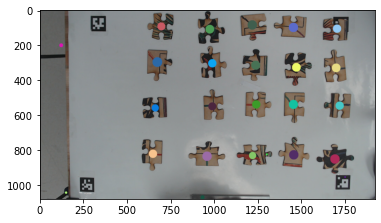

In [126]:
img = cv2.cvtColor(cv2.imread('train_imgs/g4 (3).jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(detector.process(img.copy())[0])

In [151]:
import copy
img_lists = []
for img_group in img_groups:
    
    detector = Detector()
    
    img = cv2.cvtColor(cv2.imread(img_group[0])[:, 160:], cv2.COLOR_BGR2RGB) 
    detector.process(img.copy())
    pieces_list = [p for p in detector.pieces]
    
    img_list = [[] for i in range(len(pieces_list))]
    
    for img_path in img_group:
        img = cv2.cvtColor(cv2.imread(img_path)[:, 160:], cv2.COLOR_BGR2RGB) 
        detector.process(img.copy())
        
        for i, piece in enumerate(pieces_list):
            img_height, img_width, _ = img.shape
            x = piece.x
            y = piece.y
            w = piece.width + 40
            h = piece.height + 40
            img_chunk = img[max(y-h//2, 0):min(y+h//2, img_height), max(x-w//2, 0):min(x+w//2, img_width)]
            img_list[i].append(img_chunk)
                
    img_lists.append(img_list)

In [152]:
len(img_lists)

4

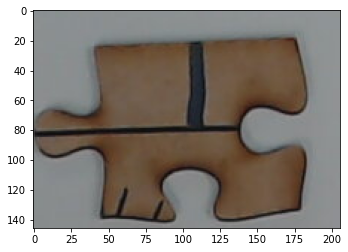

In [153]:
plt.imshow(img_lists[2][3][0])